# Necessary Imports

In [14]:
import pickle
import graph
import nstools
import matplotlib.pyplot as plt
import glob
import numpy as np


# Reference Level

## Let's first look at the matrix condition across all the reference levels

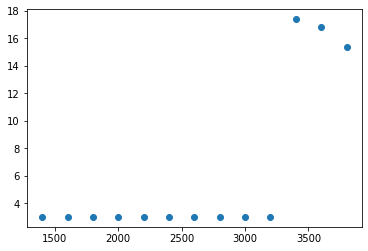

In [17]:
levels = []
conditions = []
for fname in glob.glob("small-sens/small-sens/reflevel/*"):    
    with open(fname,"rb") as f:
        meta = pickle.load(f)[2]
        conditions.append(meta["condition"])
        levels.append(meta["reflevel"])
plt.scatter(levels,np.log10(conditions))
plt.show()

## OK! Now let's look at the qualitative difference of the flow between two reference levels with low matrix condition.

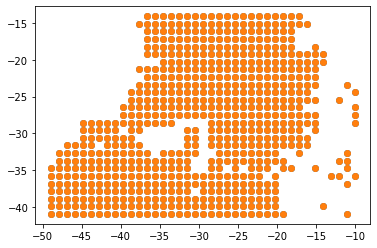

In [51]:
with open("small-sens/small-sens/reflevel/3000.pickle-small.pickle","rb") as f:
    twothousand = pickle.load(f)[0]    
with open("small-sens/small-sens/reflevel/3600.pickle-small.pickle","rb") as f:
    thirtytwohundred = pickle.load(f)[0]
plt.scatter(thirtytwohundred[3600]["lons"],thirtytwohundred[3600]["maplats"])
plt.scatter(twothousand[3600]["lons"],twothousand[3600]["maplats"])


Reference Level 2000: {'reflevel': 2000, 'upperbound': 1000, 'lowerbound': 4000, 'mixs': {'kvo': True, 'kvb': True, 'kh': True}, 'debug': False, '3point': True, 'edgeguard': True, 'H_0': 1000, 'scalecoeffs': {'Ar': 0.05, 'kvo': 4.9999999999999996e-06, 'kvb': 0.0005, 'kh': 500}, 'modelmixing': False, 'condition': 1028.3575391132854, 'error': 2588.1926238085}
Reference Level 3200: {'reflevel': 3200, 'upperbound': 1000, 'lowerbound': 4000, 'mixs': {'kvo': True, 'kvb': True, 'kh': True}, 'debug': False, '3point': True, 'edgeguard': True, 'H_0': 1000, 'scalecoeffs': {'Ar': 0.05, 'kvo': 4.9999999999999996e-06, 'kvb': 0.0005, 'kh': 500}, 'modelmixing': False, 'condition': 1028.31328287914, 'error': 4579.6008533947825}
vema
hunter
northern
southern
0
{'vema': 646463.0638713383, 'hunter': 477543.6930870003, 'curl': 0, 'pt<1.6': 477543.6930870003, 'pt<1.2': 428804.2192000164, 'pt<0.8': 0.0, 'pt<2': 425220.05438326317}
vema
hunter
northern
southern
0
[1.46521656e+01 8.62811723e+00 3.17100840e-04]

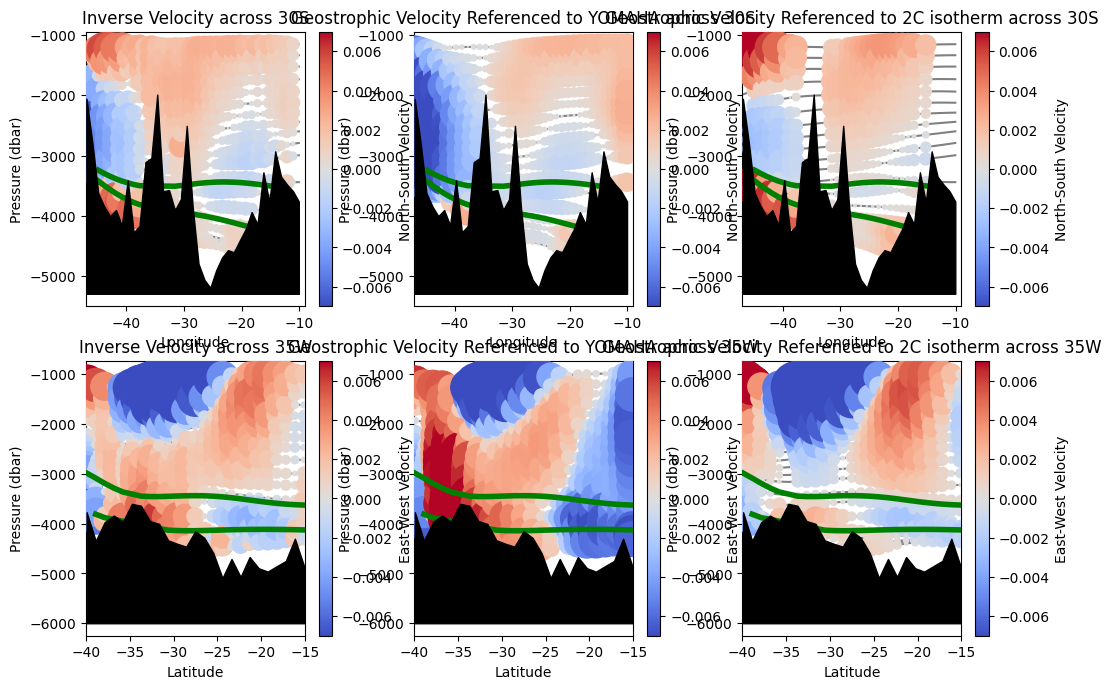

[-40.96551724 -39.93103448 -38.89655172 -37.86206897 -36.82758621
 -35.79310345 -34.75862069 -33.72413793 -32.68965517 -31.65517241
 -30.62068966 -29.5862069  -28.55172414 -27.51724138 -26.48275862
 -25.44827586 -24.4137931  -23.37931034 -22.34482759 -21.31034483
 -20.27586207 -19.24137931 -18.20689655 -17.17241379 -16.13793103
 -15.10344828 -14.06896552          nan]
-34.63414634146341
-34.63414634146341
-34.63414634146341


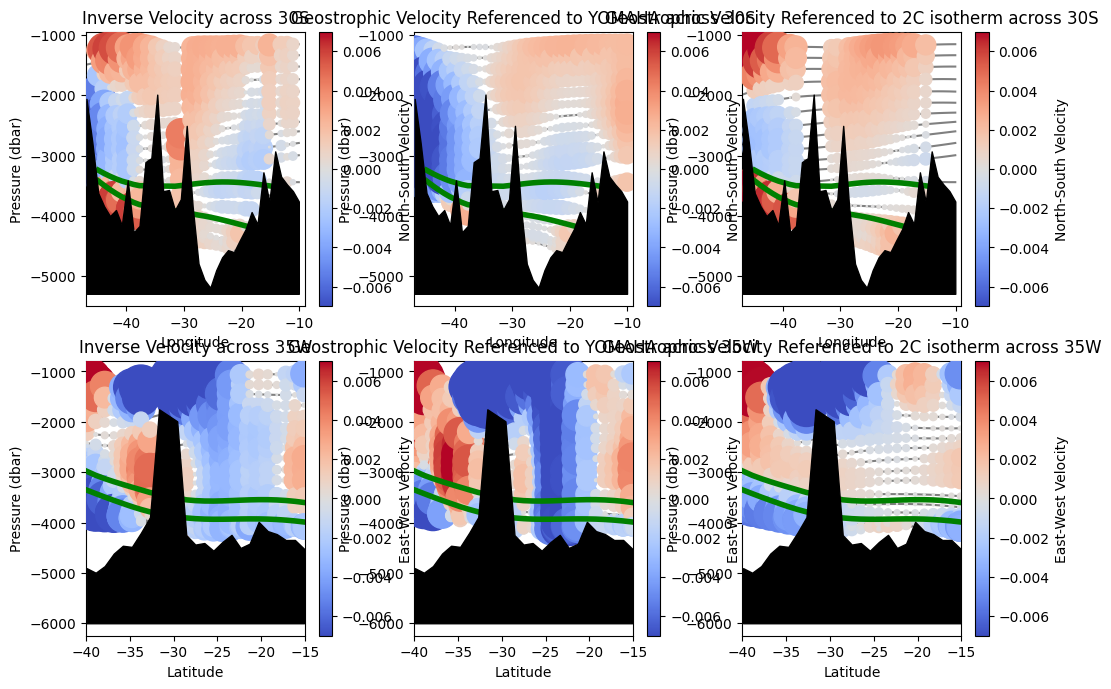

In [75]:

with open("small-sens/small-sens/reflevel/2000.pickle-small.pickle","rb") as f:
    twothousand = pickle.load(f)
    print("Reference Level 2000:",twothousand[2])    
with open("small-sens/small-sens/reflevel/3200.pickle-small.pickle","rb") as f:
    thirtytwohundred = pickle.load(f)
    print("Reference Level 3200:",thirtytwohundred[2])
print(nstools.transportDiagnostics(twothousand[0],vector=["2CU","2CV"]))
td = nstools.transportDiagnostics(twothousand[0],vector=["2CU","2CV"])
x = np.asarray([td["pt<1.6"],td["pt<1.2"],td["pt<0.8"]])                        
nstools.morrisMixing(x)

graph.bubblePlot(twothousand[0],-20,-29.5)
print(np.unique(twothousand[0][2000]["maplats"]))
graph.bubblePlot(thirtytwohundred[0],-35,-29.5)


    
## What about those reference levels with really high condition? 

Reference Level 4000: {'reflevel': 3800, 'upperbound': 1000, 'lowerbound': 4000, 'mixs': {'kvo': True, 'kvb': True, 'kh': True}, 'debug': False, '3point': True, 'edgeguard': True, 'H_0': 1000, 'scalecoeffs': {'Ar': 0.05, 'kvo': 4.9999999999999996e-06, 'kvb': 0.0005, 'kh': 500}, 'modelmixing': False, 'condition': 2251799813685248.0, 'error': 6400.04664035197}
-34.63414634146341
-34.63414634146341
-34.63414634146341


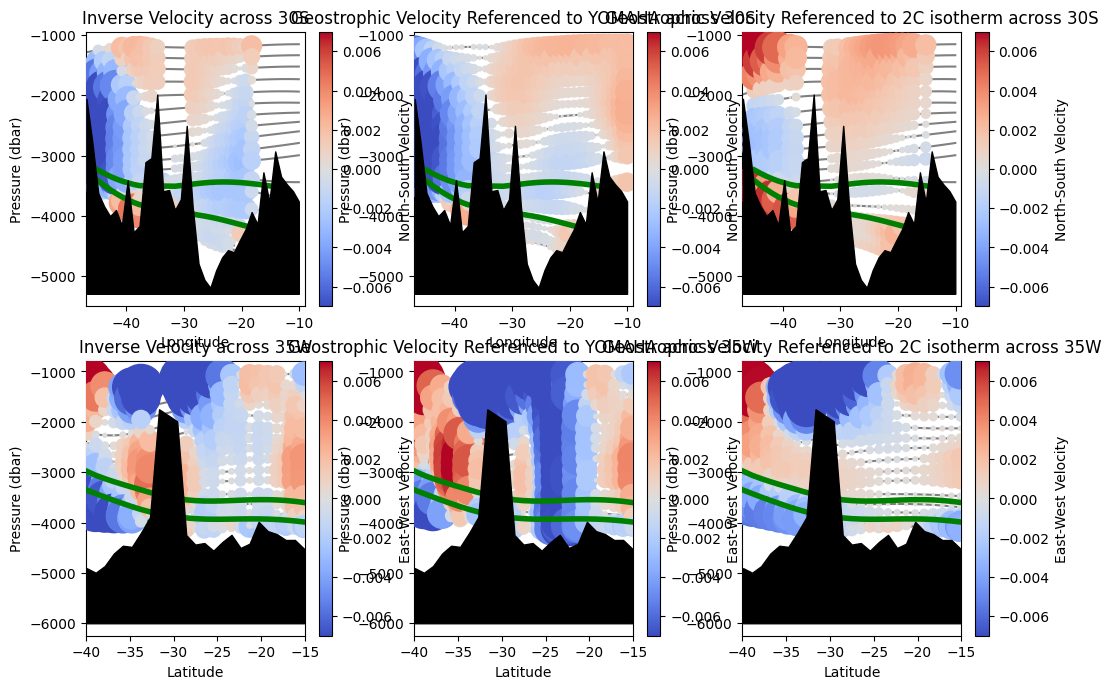

In [41]:

with open("small-sens/small-sens/reflevel/3800.pickle-small.pickle","rb") as f:
    fourthousand = pickle.load(f)
    print("Reference Level 4000:",fourthousand[2])
    
graph.bubblePlot(fourthousand[0],-35,-29.5)


# What happens if we add random gaussian noise to our identified neutral surface pressures (pre-interpolation)?

-34.63414634146341
-34.63414634146341
-34.63414634146341


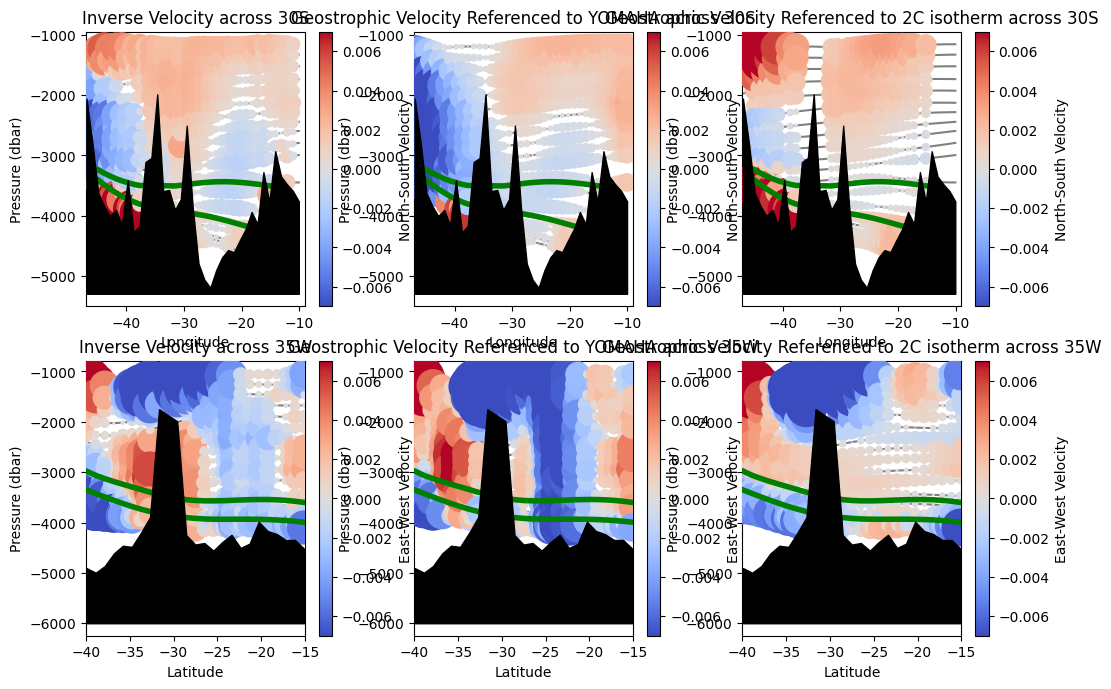

-34.63414634146341
-34.63414634146341
-34.63414634146341


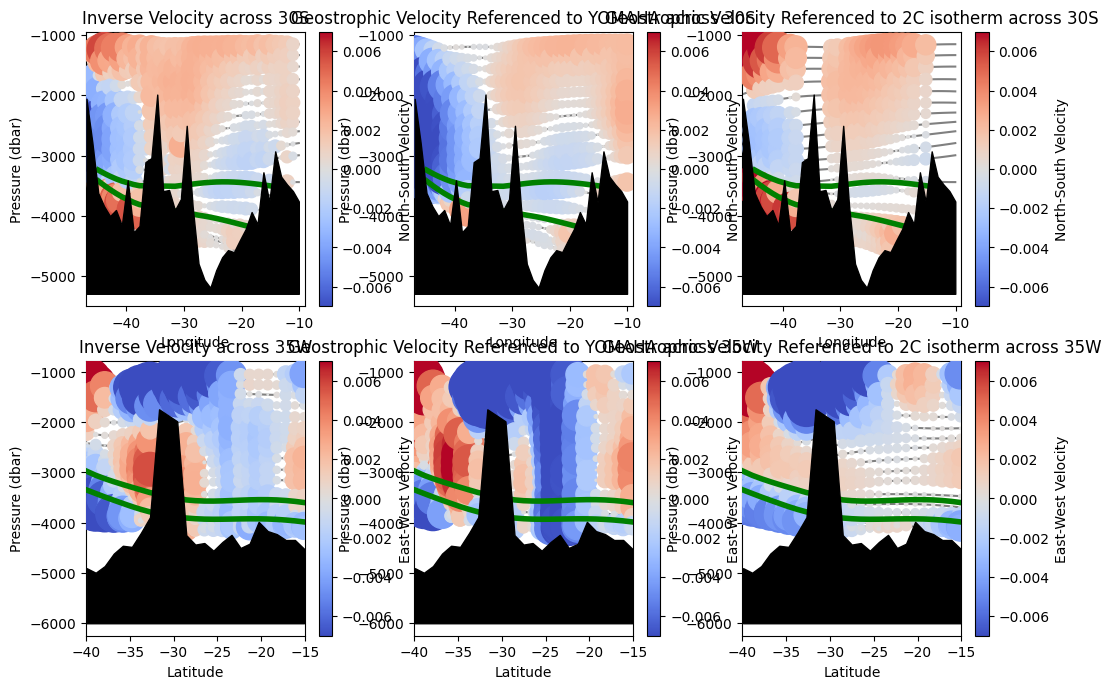

In [20]:
with open("small-sens/small-sens/noise-90.pickle-small.pickle","rb") as f:
    noise90 = pickle.load(f)[0]
with open("small-sens/small-sens/noise-30.pickle-small.pickle","rb") as f:
    noise30 = pickle.load(f)[0]
graph.bubblePlot(noise90,-35,-29.5)
graph.bubblePlot(noise30,-35,-29.5)


## Woah those look really similar! What's the actual difference in pressure between the two surfaces?

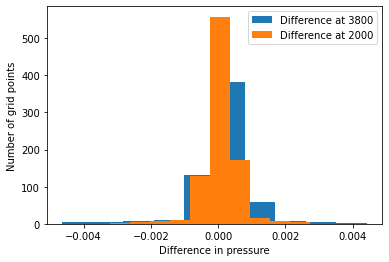

In [53]:
with open("small-sens/small-sens/nomix.pickle-small.pickle","rb") as f:
    nomix = pickle.load(f)[0]
# We can directly subtract these arrays because they are on the same grid. This isn't necessarily true if your two surfaces objects differ in that respect
plt.hist(noise90[3800]["data"]["t"]-nomix[3800]["data"]["t"],label="Difference at 3800")
plt.hist(noise90[2000]["data"]["t"]-nomix[2000]["data"]["t"],label="Difference at 2000")
plt.xlabel("Difference in pressure")
plt.ylabel("Number of grid points")
plt.legend()
plt.show()

### Seems like even with random noise with a standard deviation of 90 dbar, the GAM interpolation does a good job of minimizing it's effect on the final interpolated surfaces

In [35]:
#Bounds

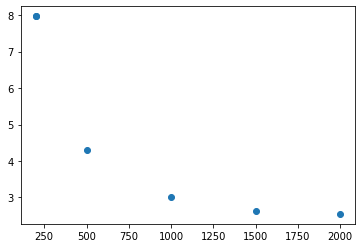

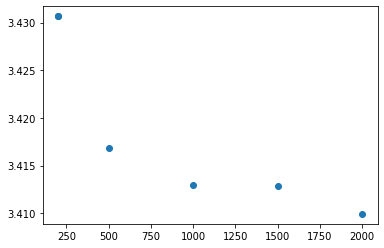

In [58]:
levels = []
conditions = []
errors= []
for fname in glob.glob("small-sens/small-sens/H_0/*"):    
    with open(fname,"rb") as f:
        meta = pickle.load(f)[2]
        conditions.append(meta["condition"])
        errors.append(meta["error"])
        levels.append(meta["H_0"])
plt.scatter(levels,np.log10(conditions))
plt.show()
plt.scatter(levels,np.log10(errors))
plt.show()
